In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


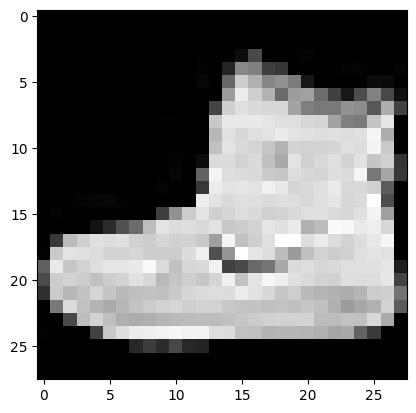

In [6]:
plt.imshow(x_train[0],cmap='gray')

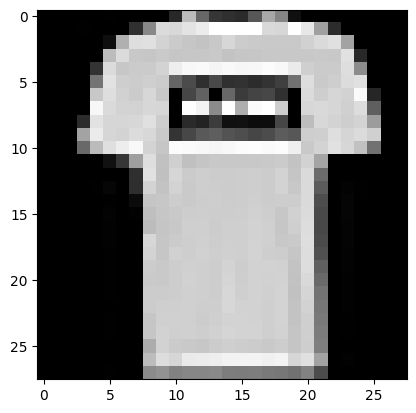

In [7]:
plt.imshow(x_train[1],cmap='gray')

In [8]:
x_train1 = x_train.astype('float32') / 255.0
x_test1 = x_test.astype('float32') / 255.0
x_train1 = x_train1.reshape(-1, 28, 28, 1)
x_test1 = x_test1.reshape(-1, 28, 28, 1)

In [9]:
x_train1.shape

(60000, 28, 28, 1)

In [10]:
x_test1.shape

(10000, 28, 28, 1)

In [11]:
y_train.shape

(60000,)

In [12]:
y_test.shape

(10000,)

In [13]:
model = keras.Sequential([
keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
keras.layers.MaxPooling2D((2,2)),
keras.layers.Dropout(0.25),
keras.layers.Conv2D(64, (3,3), activation='relu'),
keras.layers.MaxPooling2D((2,2)),
keras.layers.Dropout(0.25),
keras.layers.Conv2D(128, (3,3), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dropout(0.25),
keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train1, y_train, epochs=5, validation_data=(x_test1, y_test))

Epoch 1/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.5617 - accuracy: 0.7915 - val_loss: 0.3840 - val_accuracy: 0.8598
Epoch 2/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.3667 - accuracy: 0.8640 - val_loss: 0.3319 - val_accuracy: 0.8759
Epoch 3/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.3222 - accuracy: 0.8816 - val_loss: 0.2967 - val_accuracy: 0.8900
Epoch 4/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2975 - accuracy: 0.8899 - val_loss: 0.2818 - val_accuracy: 0.8970
Epoch 5/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2780 - accuracy: 0.8972 - val_loss: 0.2652 - val_accuracy: 0.9045


In [15]:
test_loss, test_acc = model.evaluate(x_test1, y_test,verbose=0)
print('Test loss: ',test_loss)
print('Test accuracy:', test_acc)

Test loss:  0.2652058005332947
Test accuracy: 0.9045000076293945


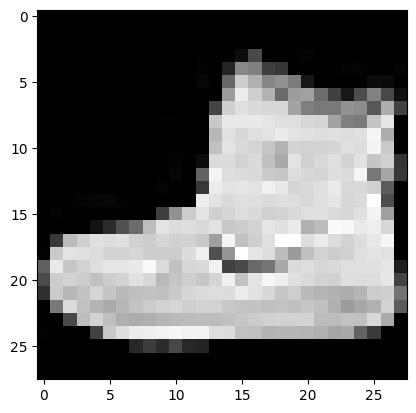

In [16]:
from PIL import Image

def preprocess_image(image_path):
    img = Image.fromarray(image_path)
    img = img.resize((28, 28),resample=Image.LANCZOS)
    img = img.convert('L')
    plt.imshow(img,cmap='gray')
    img = np.array(img) / 255.0
    img = img.reshape((1, 28, 28, 1))

    return img


input_image = preprocess_image(x_train[0])


In [17]:
item=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
prediction = model.predict(input_image,verbose=0)
print(prediction)
print("The number is:",item[np.argmax(prediction)])

[[4.1442831e-06 5.7067646e-06 1.1827302e-06 1.7079370e-05 7.5342728e-06
  7.5786753e-05 7.9615056e-06 1.3833044e-01 6.7590037e-05 8.6148262e-01]]
The number is: Ankle boot


[[1.3628270e-04 2.3909588e-09 9.9959058e-01 2.0575825e-07 3.6885835e-05
  1.2766259e-09 2.3605188e-04 4.6329385e-13 3.4568004e-08 4.4897324e-12]]
The number is: Pullover


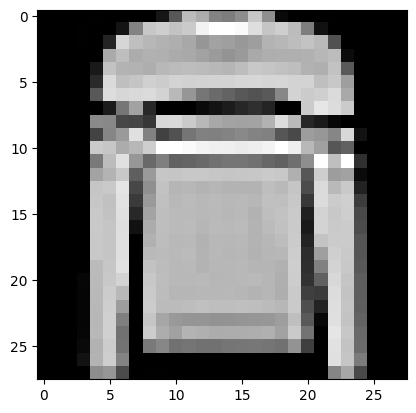

In [18]:
item=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
prediction = model.predict(preprocess_image(x_train[5]),verbose=0)
print(prediction)
print("The number is:",item[np.argmax(prediction)])

In [19]:
from PIL import Image

[[5.7655158e-03 1.2456834e-03 3.7634035e-03 5.0751492e-04 9.3304981e-05
  5.3765685e-05 5.1157591e-03 9.2996816e-05 9.8323375e-01 1.2837477e-04]]
The number is: Bag


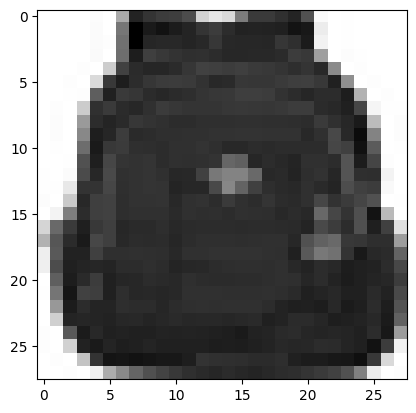

In [20]:
imgpath="/content/bag.jpeg"
img=Image.open(imgpath)
image=np.array(img)
image=preprocess_image(image)
item=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
prediction = model.predict(image,verbose=0)
print(prediction)
print("The number is:",item[np.argmax(prediction)])
